## 7.3 정규표현식

- 정규표현식(Regular expression)은 regexp 또는 regex 등으로 불림
- 복잡한 문자열 패턴을 정의하는 문자 표현 공식
- 특정한 규칙을 가진 문자열의 집합을 추출
- 정규 표현식 연습장(http://www.regexr.com/)
- http://blog.naver.com/dudwo567890/130162403749

## 메타 문자
- ^ : 문자열의 시작
- $ : 문자열의 끝. 옵션에 따라 문장의 끝 또는 문서의 끝에 매치된다.
- . : 개행 문자를 제외한 1자를 나타냄.
- [ ]: 문자의 집합을 나타냄. 문자 집합 안에 들어가 있는 문자는 그 바깥에서 하나의 문자로 취급된다.
- | : 'A|B'와 같은 경우 'A' 혹은 'B'를 나타냄(OR연산)
- ( ) : 괄호 안의 정규식을 그룹으로 만듬.
- ? : 문자가 0회 혹은 1회 반복됨을 나타냄
-  '+' : 문자가 1회 이상 반복됨을 나타냄
-  '*' : 문자가 0회 이상 반복됨을 나타냄
- {n} : 문자가 n회 반복됨을 나타냄
- {n,m} : 문자가 n회부터 m회까지 반복되는 모든 경우를 나타냄
- {n,} : 문자가 n회부터 무한 반복되는 모든 경우를 나타냄    

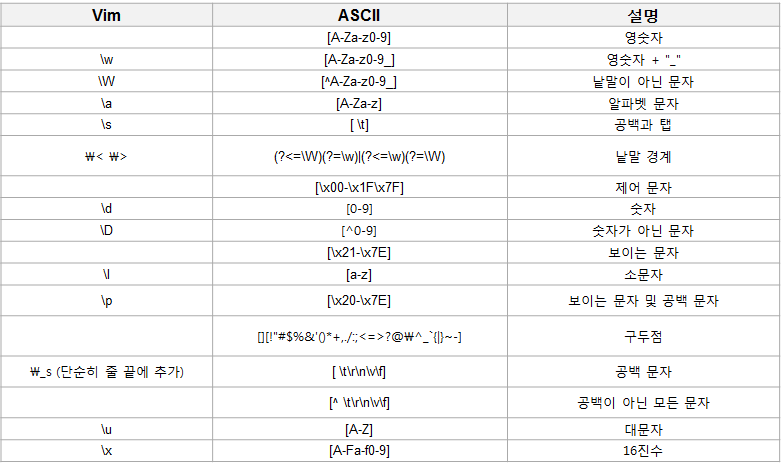

In [1]:
## 축약형 문자 표현
from IPython.display import Image
Image("./python_char_ab_1.png")

## 패턴 변경자
패턴구분자가 끝나면 그 뒤에 쓰는 것으로, 패턴에 일괄적으로 변경을 가할 때 사용한다. 

- i : 패턴을 대소문자 구분 없이 검사한다. 
    이 변경자를 사용할 경우 [a-z]로만 검사해도 자동으로 [a-zA-Z]와 같은 기능을 하게 된다. 
    가장 많이 쓰이는 패턴.
    
- s : 임의의 한 문자를 가리키는 메타 문자에 개행 문자(\n)도 포함시키도록 한다. 
    이 변경자를 사용하면 .이 줄바꿈도 임의의 한 문자로 취급하여 찾는다.

- m : 주어진 문자열에 줄바꿈이 있을 경우, 여러 줄로 취급하여 검사한다. 
    (줄바꿈이 없다면 써도 의미가 없다.) 원래 정규표현식을 쓸 때 줄바꿈은 무시되는데, 이걸 사용하면 줄바꿈을 적용해서 검사한다. 그리고 ^은 한 줄의 시작, $는 한 줄의 끝으로 의미가 달라진다.
    
- x : 공백 문자를 찾지 않고 무시해 버린다. 
    단, 이스케이프(역슬래쉬하고 같이 쓸 경우)하거나 문자 클래스 안에 있을 경우에는 이걸 써도 공백을 찾는다.

## 기본적인 정규식 예제

^[0-9]*$ : 숫자
    
^[a-zA-Z]*$ : 영문자. 패턴변경자를 써서 /^[a-z]*$/i 같이 쓸 수 있다.
    
^[가-힣]*$ : 한글(유니코드를 지원하는 정규식 엔진에 한정)
    
^[a-zA-Z0-9]*$ : 영어/숫자

## 기본 문법

문자열에서 URL을 찾는 정규표현식의 예제는 다음과 같다.

/(http|https|ftp|telnet|news|mms)://[^\"'\s()]+/i

위 정규식은 아래와 같이 구분이 된다. 

/ : 패턴구분자 시작
(http|https|ftp|telnet|news|mms)://[^\"'\s()]+ : 찾을 문자열의 패턴
/ : 패턴구분자 끝
i : 패턴변경자


## re 모듈 함수 목록
공통적으로 사용된 pattern은 앞에서 설명한 정규표현식이 사용되며, string에는 검색할 대상 문자열을 지정함.

- re.search(pattern, string[, flags]) # string 전체에 대해서 pattern이 존재하는지 검사하여 MatchObject 인스턴스를 반환함.
- re.match(pattern, string[, flags]) # string 시작부분부터 pattern이 존재하는지 검사하여 MatchObject 인스턴스를 반홤함.
- re.split(pattern, string[, maxsplit=0])  # pattern을 구분자로 string을 분리아여 리스트로 반환.
- re.findall(pattern, string[, flags])  # string에서 pattern과 매치되는 모든 경우를 찾아 리스트로 반환
- re.finditer(pattern, string[, flags])  # string에서 pattern과 일치하는 결과에 대한 이터레이터 객체를 반환.
- re.sub(pattern, reple, string[, count])  # string에서 pattern과 일치하는 부분에 대하여 repl로 교체하여 결과 문자열을 반환.
- re.subn(pattern, reple, string[, count])  # re.sub()함수와 동일하게 동작하나, 결과로(결과문자열, 매칭횟수)를 튜플로 반환.
- re.escape(string)  # 영문자, 숫자가 아닌 문자에 대하여 백슬러쉬 문자를 추가해줌. 메타 문자를 포함한 문자열을 정규식으로 변경할 수 있음.
- re.compile(pattern[, flags])  # pattern을 컴파일하여 '정규표현식 객체를 반환.

In [3]:
import re

In [55]:
print(re.match('[0-9]*th', '34th'))
print(bool(re.match('[0-9]*th', '34th')))

<_sre.SRE_Match object; span=(0, 4), match='34th'>
True


In [56]:
print(re.search('[0-9]*th','35th'))
print(bool(re.search('[0-9]*th','35th')))

<_sre.SRE_Match object; span=(0, 4), match='35th'>
True


# match()와 search()  차이점

match()와 search() 함수의 다른 점은 match()함수의 경우 대상 문자열의 시작부터 검색, search()함수는 대상 문자열 전체에 대해서 검색을 수행함.

In [54]:
print(bool(re.match('[0-9]*th', '          35th')))
print(bool(re.match('ap','This is an apple')))       # 문자열의 시작부터 검색하므로 False를 리턴해 준다.

False
False


In [53]:
print(bool(re.search('[0-9]*th', '              35th')))
print(bool(re.search('ap','This is an apple')))          # 문자열 전체에 대해서 검색하므로 True를 리턴해 준다.

True
True


In [4]:
re.split('\W+', 'Words, first, two')

['Words', 'first', 'two']

In [52]:
print(re.split('[:. ]+', 'apple Orange:banana tomato ,very good!!'))    # ':', '.', '공백' 문자를 구분자로 사용함.
print(re.split('([:. ])+', 'apple Orange:banana tomato ,very good !!'))  # 패턴에 괄호를 사용하면 해당 분리 문자도 결과 문자열에 포함됨.
print(re.split('[:. ]+', 'apple Orange:banana tomato ,very good !!',2)) # maxsplit 값을 설정하면 해당 수치값만큼만 분리함.

['apple', 'Orange', 'banana', 'tomato', ',very', 'good!!']
['apple', ' ', 'Orange', ':', 'banana', ' ', 'tomato', ' ', ',very', ' ', 'good', ' ', '!!']
['apple', 'Orange', 'banana tomato ,very good !!']


In [50]:
print(re.findall(r"app\w*", "application orange apple banana")) #패턴과 매칭되는 모든 경우를 리스트로 반환함.
print(re.findall(r"king\w*", "application orange apple banana")) # 매치되는 문자열이 없는 경우, 빈 리스트를 반환함.

['application', 'apple']
[]


In [49]:
print(re.sub("-", "", "901225-1234567")) # 검색 대상 문자열에서 "-"값을 ""값으로 대체함.
print(re.sub(r"[:,|\s]", ", ", "Apple:Orage Banana|Tomato"))

9012251234567
Apple, Orage, Banana, Tomato


In [48]:
## 비효율적인 동작을 피하고자 정규표현식을 컴파일하여 정규표현식 객체를 생성.
c = re.compile(r"app\w*") # 정규식을 분석하여 객체에 저장함.
print(c.findall("application orange apple banana")) # 분석없이 검색
print(c.findall("There are so many apples in the basket"))

['application', 'apple']
['apples']


** 아래의 정규표현식 객체가 지원하는 메소드로 re모듈의 검색함수와 이름이 동일함. 
다른 점이 있다면 정규식이 이미 객체에 컴파일 되어 있기 때문에, re모듈과 다르게 정규식을 인자로 전달할 필요가 없음. **
- search(string[,pos[,endpos]]) : string전체에 대해서 컴파일된 패턴이 존재하는지 검사하여 MatchObject인스턴스를 반환
- match(string[,pos[,endpos]])  : string에 시작부분부터 컴파일된 패턴이 존재하는지 검사하여 MatchObject인스턴스를 반환
- split(string[,maxsplit=0])    : 컴파일된 패턴을 구분자로 string을 분리하여 리스트로 반환
- findall(string[,pos[,endpos]]): string에서 컴파일된 패턴과 매치되는 모든 경우를 찾아 리스트로 반환
- finditer(string[,pos[,endpos]]): string에서 컴파일된 패턴과 일치하는 결과에 대한 이터레이터 객체를 반환
- sub(repl,string[,count=0]) : string에서 컴파일된 패턴과 일치하는 부분에 대하여 repl로 교체하여 결과 문자열을 반환
- subn(repl,string[,count=0]) : re.sub()함수와 동일하게 동작하나, 결과(결과문자열,매칭횟수)를 튜플로 반환

## compile()함수를 이용하여 정규식을 분석하는 경우 플래그인을 사용할 수 있음.
- re.I(re.IGNORECASE) # 대소문자를 구분하지 않고 매칭작업을 수행함.
- re.M(re.MULTILINE)  # 문자열이 여러 줄인 경우, 이 플래그가 설정되면 '^'는 각 행의 처음을, '$'는 각 행의 마지막을 나타냄.
- re.S(re.DOTALL)     # 개행문자도 '.'으로 매칭됨. 기본값은 '.'은 개행문자와 매칭되지 않음.
- re.X(re.VERBOSE)    # 정규표현식을 보기 쉽게 작성할 수 있음. 정규표현식에서 '#'으로 시작하는 파이썬 주석과 빈 공백은 무시함.
.....

In [47]:
s = 'Apple is a big company and apple is very deliciout'
c = re.compile('apple')       # 대소문자를 구분하는 경우
print(c.findall(s))

c = re.compile('apple', re.I) # 문자열 검색시 re.I를 설정하여 대소문자를 구분하지 않는 경우.
print(c.findall(s))

['apple']
['Apple', 'apple']


In [2]:
# 정규표현식을 활용하여 Naver의 title 테그 정보를 추출해 보자.

import urllib.request, re
web = urllib.request.urlopen("https://docs.python.org")
html = web.read()
#html
web.close()
code = str(html).encode('utf-8').decode('cp949') # 원도우 형식의 문자열로 변경
c = re.compile(r'.*?<title.*?>(.*)</title>',re.I|re.S) #두개의 플래그를 설정
c.findall(code)


['Overview &mdash; Python 3.5.2 documentation']

## Match 객체 Group
- group() : Group을 만들기 위해서는 ( )를 사용하며 특수 그룹은 첫 번째 ( 다음에 ?를 넣은 다음("(?") 다양한 문자 표현을 사용해서 정규표현식 문법을 만들 수 있다.
- groups() :  매칭된 결과를 튜플 형태로 반환한다.
- groupdict() : 이름이 붙어진 매칭 결과를 사전 형태로 반환.

In [46]:
import re
telChecker = re.compile(r"(\d{2,3})-(\d{3,4})-(\d{4})") # 전화번호를 인식하는 정규식 객체를 생성함.
print(bool(telChecker.match("02-123-4567"))) # 정규식과 일치하면 True 반환
print(bool(telChecker.match("02-rk123-4567"))) # 정규식과 일치하지 않으므로 False 반환
# 이렇게 검색된 결과는 group(), groups()로 매칭된 내용을 확인할 수 있음.

True
False


In [45]:
m = telChecker.match("02-123-4567")
print(m.groups())     # 매칭된 문자열 집합을 튜플로 반환
print(m.group())      # 매칭된 전체 문자열을 반환
print(m.group(1))     # 첫 번재로 매칭된 문자열
print(m.group(2, 3))  # 두 번째와 세 번째 매칭된 문자열을 튜플로 반환.
print(m.start())      # 매칭된 전체 문자열의 시작 인덱스
print(m.end())        # 매칭된 전체 문자열의 종료 인덱스
print(m.start(2))     # 두번째 매칭된 문자열("123")의 시작 인덱스
print(m.end(2))       # 두번째 매칭된 문자열("123")의 종료 인덱스
print(m.string[m.start(2):m.end(3)]) # 지역번호를 제외한 전화번호만 출력

('02', '123', '4567')
02-123-4567
02
('123', '4567')
0
11
3
6
123-4567


In [61]:
m= re.match(r"(?P<area_code>\d+)-(?P<exchange_number>\d+)-(?P<user_number>\d+)", "02-123-4567") # 매칭되는 문자열에 이름을 부여함.
print(m.group("user_number"))  # 'user_number'의 이름에 해당하는 문자열
print(m.start("user_number"))  # 'user_number'의 이름에 해당하는 시작 인덱스
print(m.groupdict())           # 검색된 모든 문자열에 대해서 사전 형태로 반환.

4567
7
{'area_code': '02', 'user_number': '4567', 'exchange_number': '123'}
